<a href="https://colab.research.google.com/github/tamim36/Artificial-Intelligence/blob/main/AI-Assignments/HouseRentByLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

In [171]:
# import dataset 
bostonDataset = load_boston()

In [172]:
type(bostonDataset)

sklearn.utils.Bunch

In [173]:
bostonDataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [174]:
bostonDataset.DESCR
# paste this result as below markdown text

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.

The Boston house-price data has been used in many machine learning papers that address regression
problems.   
     
.. topic:: References

   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.


In [175]:
bostonDataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [176]:
# MEDV is a target variable
bostonDataset.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [177]:
data = bostonDataset.data

In [178]:
type(data)

numpy.ndarray

In [179]:
data.shape

(506, 13)

In [180]:
# Convert to pandas dataframe
df = pd.DataFrame(data = data, columns=bostonDataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [181]:
df['RENT'] = bostonDataset.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RENT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# **Data Information**

In [182]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RENT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  RENT     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [184]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
RENT       0
dtype: int64

# **Data Visualization**

In [185]:
sns.set_palette("GnBu_d")
sns.set_style("whitegrid")

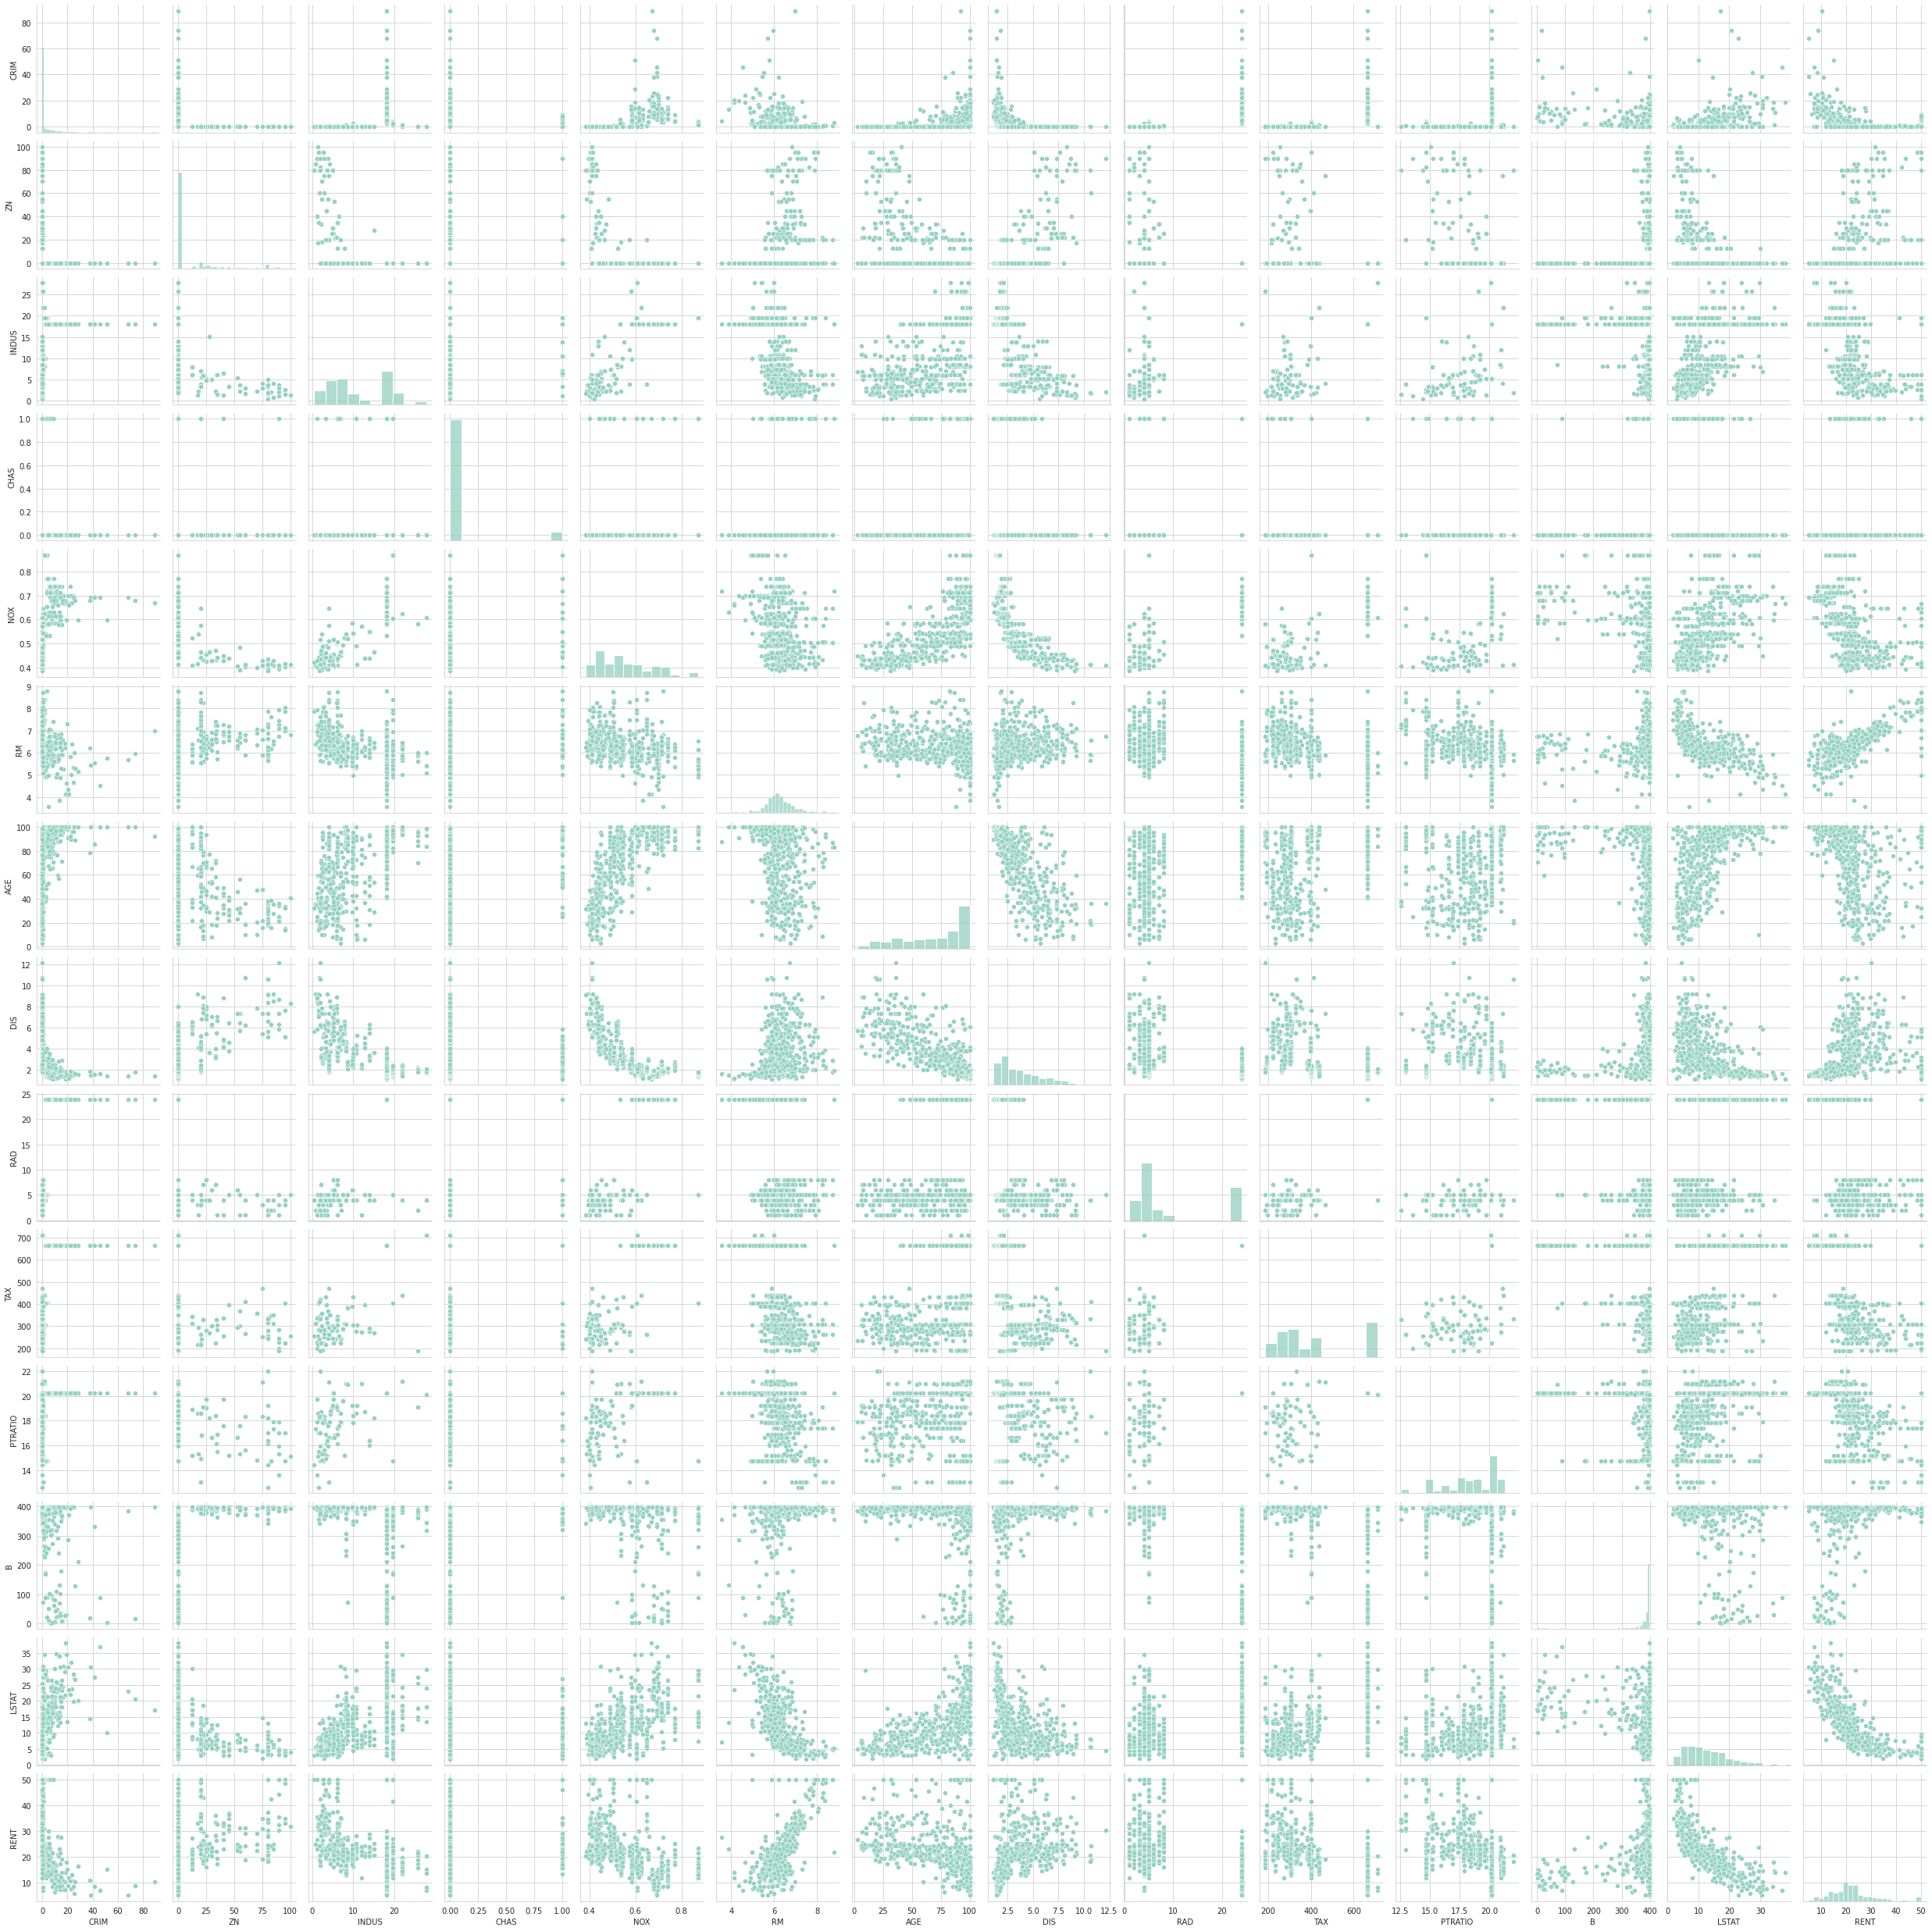

In [186]:
sns.pairplot(df)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

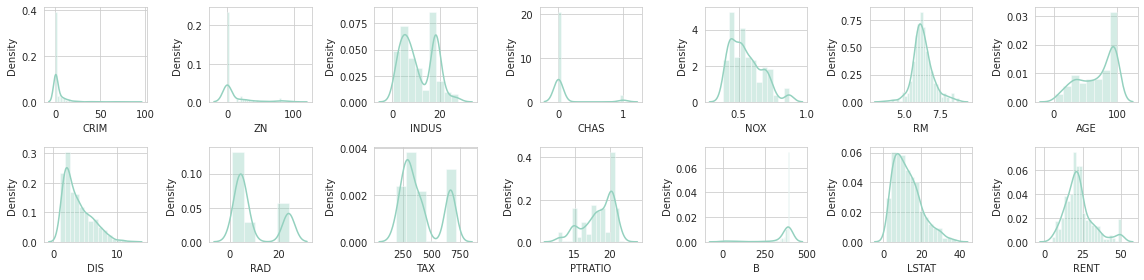

In [187]:
# Draw a distribution plot
rows = 2
cols = 7
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (16,4))

col = df.columns
index = 0

for i in range(rows):
  for j in range(cols):
    sns.distplot(df[col[index]], ax=ax[i][j])
    index = index+1

plt.tight_layout()

In [188]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RENT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


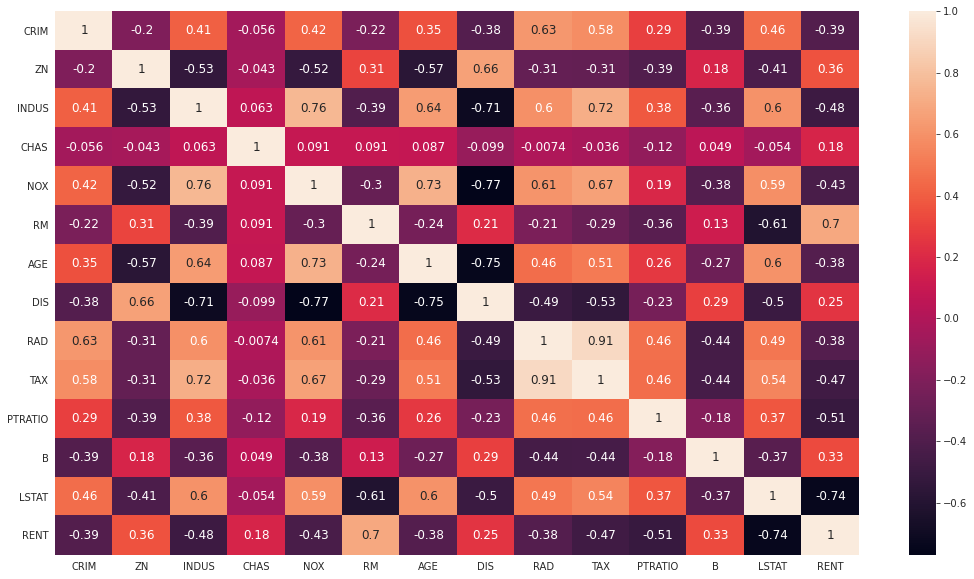

In [189]:
fig, ax = plt.subplots(figsize = (18,10))
sns.heatmap(corr,annot=True, annot_kws={'size': 12})

In [190]:
 corr.index.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'RENT'], dtype=object)

In [191]:
corr['RENT']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
RENT       1.000000
Name: RENT, dtype: float64

In [192]:
def getCorrelatedFeature(corrdata, threshold):
  feature = []
  value = []
  for i, index in enumerate(corrdata.index):
    if abs(corrdata[index]) > threshold:
      feature.append(index)
      value.append(corrdata[index])

  df = pd.DataFrame(data=value, index=feature, columns=['Corr Feature'])
  return df

In [193]:
threshold = 0.6
corr_feature = getCorrelatedFeature(corr['RENT'], threshold)
corr_feature

,Corr Feature
RM,0.695360
LSTAT,-0.737663
RENT,1.000000


In [194]:
corr_feature.index

Index(['RM', 'LSTAT', 'RENT'], dtype='object')

In [195]:
correlated_data = df[corr_feature.index]
correlated_data.head()

,RM,LSTAT,RENT
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


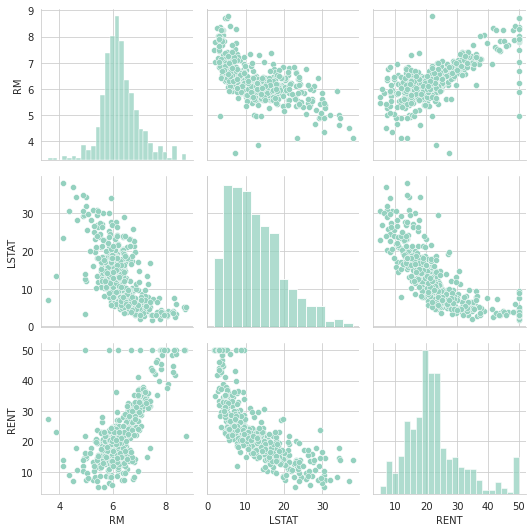

In [196]:
sns.pairplot(correlated_data)
plt.tight_layout()

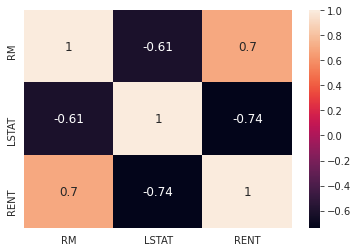

In [197]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size':12})

# **Splitting Dataset**

In [198]:
X = correlated_data.drop(labels=['RENT'], axis=1)
y = correlated_data['RENT']
X.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [200]:
X_train.shape, X_test.shape

((404, 2), (102, 2))

# **Train Model**

In [201]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [202]:
y_predict = lm.predict(X_test)

In [203]:
result = pd.DataFrame(data=[y_predict, y_test])
result.T

,0,1
0,26.285878,22.6
1,24.253779,50.0
2,24.420602,23.0
3,13.117541,8.3
4,22.495118,21.2
...,...,...
97,27.569601,24.7
98,20.199921,14.1
99,19.456057,18.7
100,25.164363,28.1


# **Perfomance Metrics**

**Coefficient of Determination, R2**

R2 range is from 0 to 1
if R2 = 0 then bad model 
and if R2 = 1 then good model 

In [204]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [205]:
r2_score_value = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

In [206]:
rmse = np.sqrt(mse)

In [207]:
print("R2 score: " , r2_score_value)
print("MAE: " , mae)
print("MSE: " , mse)
print("rmse: " , rmse)

R2 score:  0.5409084827186418
MAE:  4.14244465623856
MSE:  37.38310563877995
rmse:  6.114172522817781


**Regression Plot**

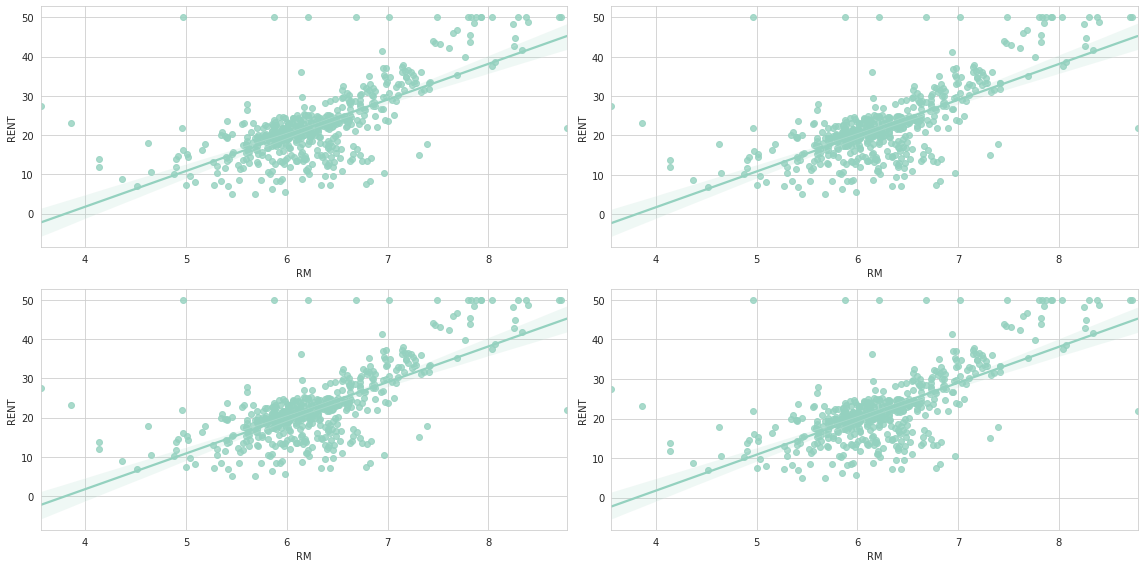

In [208]:
rows = 2
cols = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(16,8))

col = correlated_data.columns
index = 0

for i in range(rows):
  for j in range(cols):
    sns.regplot(x = correlated_data[col[index]], y = correlated_data['RENT'], ax = ax[i][j])

fig.tight_layout()

# **Method to Store Feature Perfomance**

In [209]:
total_features = []
total_features_name = []
selected_correlation_value = []
r2_score_values = []
mae_values = []
mse_values = []
rmse_values = []

In [210]:
from sklearn import metrics

In [211]:
def perfomance_matrics(features, threshold, y_true, y_pred):
  r2_score = metrics.r2_score(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = np.sqrt(mse)

  total_features.append(len(features)-1)
  total_features_name.append(str(features))
  selected_correlation_value.append(threshold)
  r2_score_values.append(r2_score)
  mae_values.append(mae)
  mse_values.append(mse)
  rmse_values.append(rmse)

  metrics_dataframe = pd.DataFrame(data=[total_features_name, total_features, selected_correlation_value, r2_score_values, mae_values, mse_values, rmse_values],
                                   index=['feature_name', 'total_feature', 'corr_values', 'r2_score', 'mae', 'mse', 'rmse'])
  return metrics_dataframe.T

**Get value for threshold > 50%**

In [212]:
threshold = 0.50
perfomance_matrics(correlated_data.columns.values, threshold, y_test, y_predict)

,feature_name,total_feature,corr_values,r2_score,mae,mse,rmse
0,['RM' 'LSTAT' 'RENT'],2,0.5,0.540908,4.14244,37.3831,6.11417


# **Check with other feature combination and threshold > 60%**

**Method to get y predict**

In [213]:
def get_y_predict(corr_data):
  X = corr_data.drop(labels = 'RENT', axis=1)
  y = corr_data['RENT']
  
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  return y_predict

In [214]:
corr['RENT']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
RENT       1.000000
Name: RENT, dtype: float64

In [215]:
threshold = 0.6
corr_value = getCorrelatedFeature(corr['RENT'], threshold)
corr_value

,Corr Feature
RM,0.695360
LSTAT,-0.737663
RENT,1.000000


In [216]:
correlated_data = df[corr_value.index]
correlated_data.head()

,RM,LSTAT,RENT
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [217]:
y_predict = get_y_predict(correlated_data)

In [218]:
perfomance_matrics(correlated_data.columns.values, threshold, y_test, y_predict)

,feature_name,total_feature,corr_values,r2_score,mae,mse,rmse
0,['RM' 'LSTAT' 'RENT'],2,0.5,0.540908,4.14244,37.3831,6.11417
1,['RM' 'LSTAT' 'RENT'],2,0.6,0.540908,4.14244,37.3831,6.11417


**Not test on 70%**

In [219]:
threshold = 0.7
corr_value = getCorrelatedFeature(corr['RENT'], threshold)
corr_value

,Corr Feature
LSTAT,-0.737663
RENT,1.000000


In [220]:
correlated_data = df[corr_value.index]
y_predict = get_y_predict(correlated_data)
perfomance_matrics(correlated_data.columns.values, threshold, y_test, y_predict)

,feature_name,total_feature,corr_values,r2_score,mae,mse,rmse
0,['RM' 'LSTAT' 'RENT'],2,0.5,0.540908,4.14244,37.3831,6.11417
1,['RM' 'LSTAT' 'RENT'],2,0.6,0.540908,4.14244,37.3831,6.11417
2,['LSTAT' 'RENT'],1,0.7,0.430957,4.86401,46.3363,6.80708


**Now test on 30%**

In [221]:
threshold = 0.3
corr_value = getCorrelatedFeature(corr['RENT'], threshold)
correlated_data = df[corr_value.index]
y_predict = get_y_predict(correlated_data)
perfomance_matrics(correlated_data.columns.values, threshold, y_test, y_predict)

,feature_name,total_feature,corr_values,r2_score,mae,mse,rmse
0,['RM' 'LSTAT' 'RENT'],2,0.5,0.540908,4.14244,37.3831,6.11417
1,['RM' 'LSTAT' 'RENT'],2,0.6,0.540908,4.14244,37.3831,6.11417
2,['LSTAT' 'RENT'],1,0.7,0.430957,4.86401,46.3363,6.80708
3,['CRIM' 'ZN' 'INDUS' 'NOX' 'RM' 'AGE' 'RAD' 'T...,11,0.3,0.528773,4.12438,38.3713,6.19445


In [222]:
# So here for LSTAT and RM the R2 score is better